## Introduction to Computer Vision (Spring 2021)

Instructors: Muhammad Fahim, Riby Abraham Boby


Acknowledgement
This lab was maintained by Riby A. B., Marcus, Rufina, Alex and Fahim

This lab was created by: Rauf
Email: goodraff@gmail.com
Links: github , LinkedIn

## Lab Objectives
Descriptors, Detectors

## Import libraries, download images

In [1]:
from IPython.display import clear_output
#for sift
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17
clear_output()

In [2]:
# all plots will be set directly below the code cell that produced it
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import clear_output
# remove grid lines
import numpy as np
import time
import cv2

## Download images

In [3]:
!wget https://сезоны-года.рф/sites/default/files/images/shkolnikam/gora.jpg -O mountains.jpg
!wget https://github.com/RufinaMay/CV2019Fall_Pictures/blob/bc8bffbc40fa5a1dd9c4bca6b447f01e574c4c57/mouse.jpg?raw=true -O mouse.jpg
!wget https://github.com/RufinaMay/CV2019Fall_Pictures/blob/bc8bffbc40fa5a1dd9c4bca6b447f01e574c4c57/mouse_scene.jpg?raw=true -O mouse_scene.jpg
!wget https://github.com/RufinaMay/CV2019Fall_Pictures/blob/bc8bffbc40fa5a1dd9c4bca6b447f01e574c4c57/panorama1.jpg?raw=true -O panorama1.jpg
!wget https://github.com/RufinaMay/CV2019Fall_Pictures/blob/bc8bffbc40fa5a1dd9c4bca6b447f01e574c4c57/panorama2.jpg?raw=true -O panorama2.jpg
!wget https://github.com/RufinaMay/CV2019Fall_Pictures/blob/bc8bffbc40fa5a1dd9c4bca6b447f01e574c4c57/book.jpg?raw=true -O book.jpg
!wget https://github.com/RufinaMay/CV2019Fall_Pictures/blob/bc8bffbc40fa5a1dd9c4bca6b447f01e574c4c57/book_scene.jpg?raw=true -O book_scene.jpg
!wget https://github.com/RufinaMay/CV2019Fall_Pictures/blob/bc8bffbc40fa5a1dd9c4bca6b447f01e574c4c57/book_scene_2.jpg?raw=true -O book_scene_2.jpg
clear_output()

## Helper functions

In [4]:
# function to read and resize an image
def read_and_resize(filename, grayscale = False, fx= 0.5, fy=0.5):
    if grayscale:
      img_result = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
      imgbgr = cv2.imread(filename, cv2.IMREAD_COLOR)
      # convert to rgb
      img_result = cv2.cvtColor(imgbgr, cv2.COLOR_BGR2RGB)
    # resize
    img_result = cv2.resize(img_result, None, fx=fx, fy=fy, interpolation = cv2.INTER_CUBIC)
    return img_result

    
def showInRow(list_of_images, titles = None, disable_ticks = False):
  count = len(list_of_images)
  for idx in range(count):
    # set inline plots size
    plt.rcParams["figure.figsize"] = (16, 10) # (w, h)
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()

## Harris corner detector

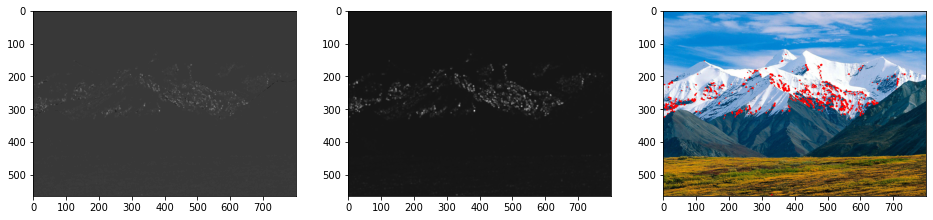

In [5]:
mountains_img = read_and_resize('mountains.jpg')

gray = cv2.cvtColor(mountains_img,cv2.COLOR_RGB2GRAY)

# cv.cornerHarris(src, blockSize, ksize, k)
# blockSize	Neighborhood size.
# ksize	Aperture parameter for the Sobel operator.
corners = cv2.cornerHarris(gray,3,3,0.04)

# Dilate responses to make them more visible (only needed for visualization!)
dest = cv2.dilate(corners, None) 
  
# Color pixels in the original image red, where
# the Harris response is above a given threshold
mountains_img[dest > 0.1 * dest.max()]=[255, 0, 0] 

    
showInRow([corners, dest, mountains_img])

## Exercise: Implement Harris corner detector

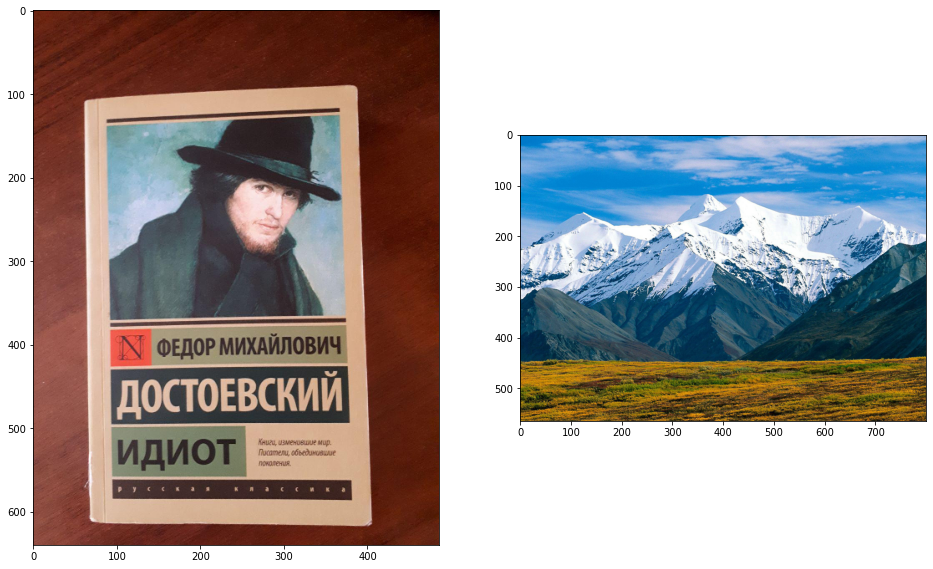

(640, 486)
(564, 800)


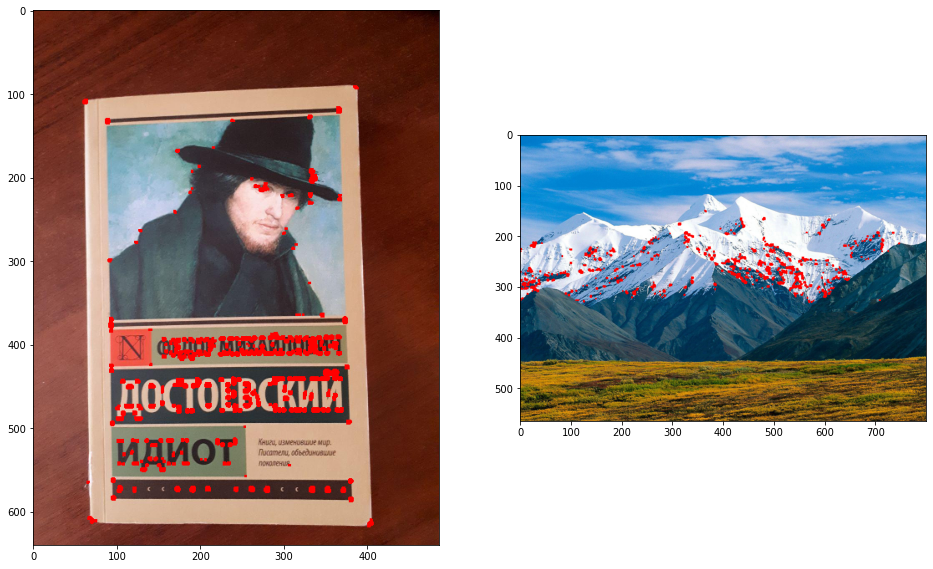

In [6]:
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.feature import corner_harris, corner_peaks

def harris(img, k = 0.04):
  # convert image to a grayscale
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
  # smoothen the image
  def MedianBlur(img1,size) :
    Ic = img1

    # run a loop from half of the size + 1 to  upto
    # number of rows present in the image
    for i in range(size//2 + 1, Ic.shape[0]) :
        
        # run a loop  from half of the size + 1 upto
        # number of columns present in the image
        for j in range(size//2 +1, Ic.shape[1]) :

            # Take a sub-matrix of specifed order form Ic image matrix 
            N = Ic[i-size//2 : i+ size//2 + 1, j - size//2: j+ size//2 + 1]

            # find out median of submatrix
            med = np.median(N)

            # assing that medium value to the specified pixel coordinates 
            img1[i, j] = med

    # return blur image
    return img1
  filter=3
  gray = MedianBlur(gray,filter)

  # find derivatives
  I_x = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=3)
  I_y = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=3)

  # calculate combination of derivatives to calculate structure tensors
  # Ixx=np.power(I_x,2
  # Iyy=I_y**2
  # Ixy=I_x*I_y
  Ixx = ndi.gaussian_filter(I_x**2, sigma=1)
  Ixy = ndi.gaussian_filter(I_y*I_x, sigma=1)
  Iyy = ndi.gaussian_filter(I_y**2, sigma=1)
  print(Ixx.shape)

  # Harris response calculation
  # Remember to account for the window size! Only use full sized windows!
  w_size = 3

  # determinant
  detA = Ixx * Iyy - Ixy ** 2
  # trace
  traceA = Ixx + Iyy
      
  harris_response = detA - k * traceA ** 2
  corners = np.copy(img)

  harris_response=cv2.dilate(harris_response,None)
  # # Dilate responses to make them more visible
  
  # print(dest.max())
  #dest=corners
  # Color pixels in the original image red, where
  # the Harris response is above a given threshold
  corners[harris_response > k * harris_response.max()]=[255, 0, 0] 
  #img=dest
  return corners
      

# CHECK YOUR IMPLEMENTATION
book_img = read_and_resize('book.jpg')
mountains_img = read_and_resize('mountains.jpg')

showInRow([book_img, mountains_img])

books_img_c = harris(book_img, 0.02)
mountains_img_c = harris(mountains_img, 0.04)
      
showInRow([books_img_c, mountains_img_c])

## SIFT

Number of key points: 2511
Key point type is: <class 'cv2.KeyPoint'>


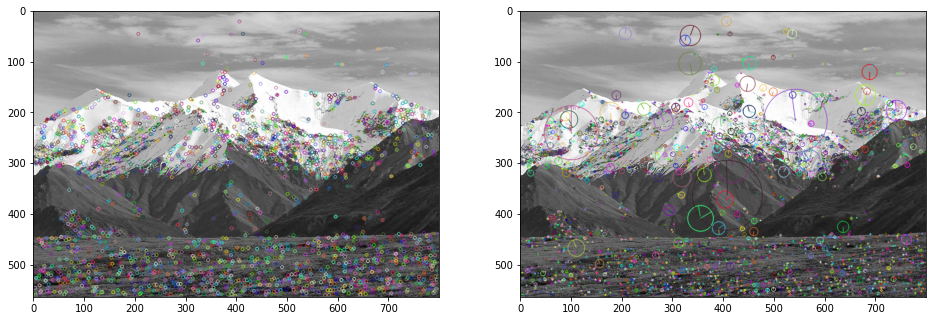

In [7]:
mountains_img = read_and_resize('mountains.jpg')
img = mountains_img.copy()

gray= cv2.cvtColor(mountains_img,cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()#check documentation at https://docs.opencv.org/3.4/d0/d13/classcv_1_1Feature2D.html#aa4e9a7082ec61ebc108806704fbd7887
kp = sift.detect(gray,None)

print(f'Number of key points: {len(kp)}')
print(f'Key point type is: {type(kp[0])}')
gray2 = gray.copy()
img2 = img.copy()

img=cv2.drawKeypoints(gray,kp,None)#check documentation at https://docs.opencv.org/3.4/d4/d5d/group__features2d__draw.html#gab958f8900dd10f14316521c149a60433
img2=cv2.drawKeypoints(gray2,kp,None,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

showInRow([img, img2])

**cv2.KeyPoint** attributes:

angle
 
octave - octave (pyramid layer) or scale from which the keypoint has been extracted
 
pt - coordinates of the keypoints
 
response - the response by which the most strong keypoints have been selected.
 
size - diameter of the meaningful keypoint neighborhood



## SIFT usage

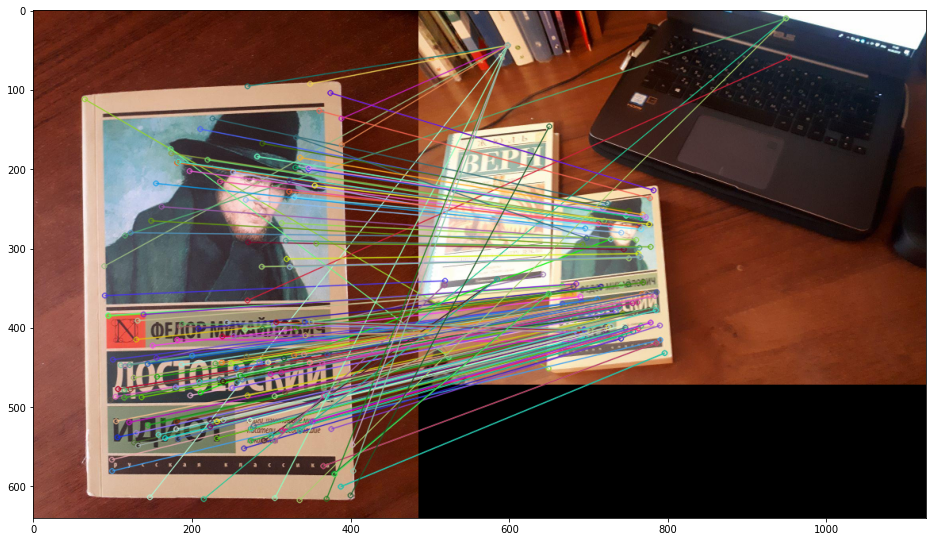

(<matplotlib.image.AxesImage at 0x7fd4bf5e01d0>, None)

In [8]:
book = read_and_resize('book.jpg', 0)
scene = read_and_resize('book_scene.jpg', 0)

sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(book,None)
kp2, des2 = sift.detectAndCompute(scene,None)

# BFMatcher (brute force) with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)#consider two best matches to check the distances using ratio
#check documentation at https://docs.opencv.org/3.4/db/d39/classcv_1_1DescriptorMatcher.html#a378f35c9b1a5dfa4022839a45cdf0e89

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects a list of lists as matches.
img3 = cv2.drawMatchesKnn(book,kp1,scene,kp2,good,None,flags=2)
#Check documentation at https://docs.opencv.org/3.4/d4/d5d/group__features2d__draw.html

plt.imshow(img3),plt.show()

## One more example

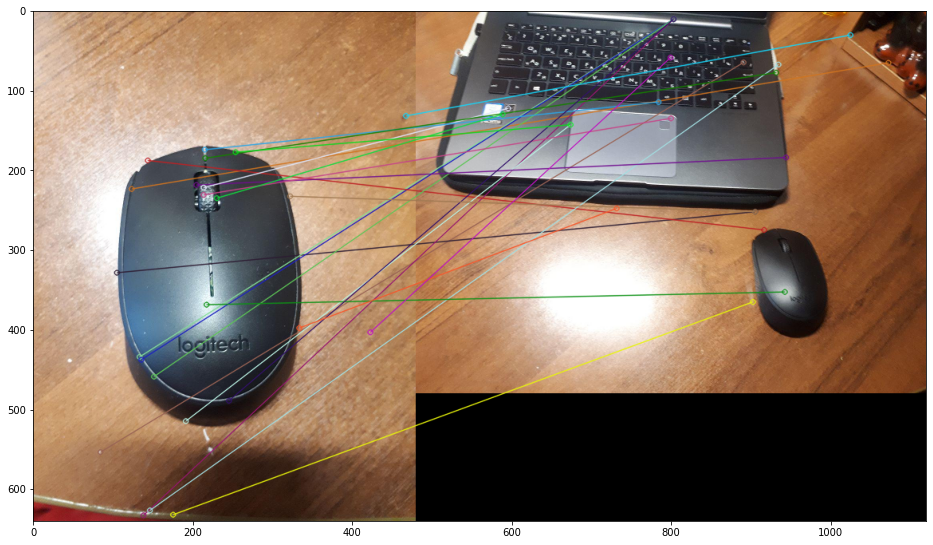

(<matplotlib.image.AxesImage at 0x7fd4bf52e810>, None)

In [10]:
mouse = read_and_resize('mouse.jpg', 0)
scene = read_and_resize('mouse_scene.jpg', 0)

sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(mouse,None)
kp2, des2 = sift.detectAndCompute(scene,None)


# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.8*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(mouse,kp1,scene,kp2,good,None,flags=2)

plt.imshow(img3),plt.show()

## Exercise: Creating panoramas using SIFT

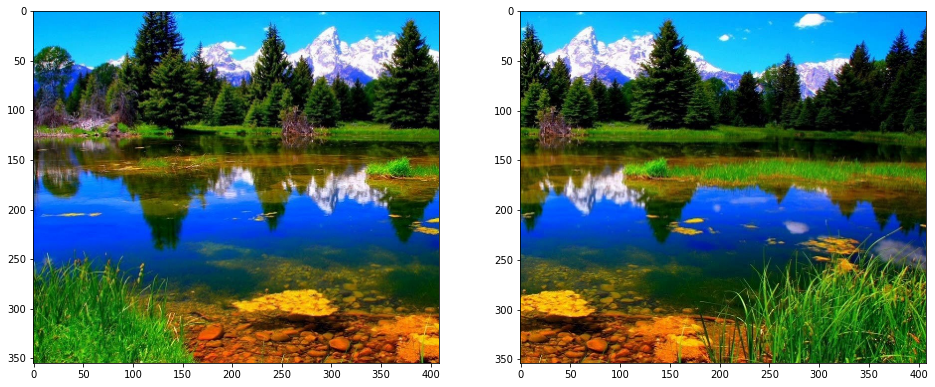

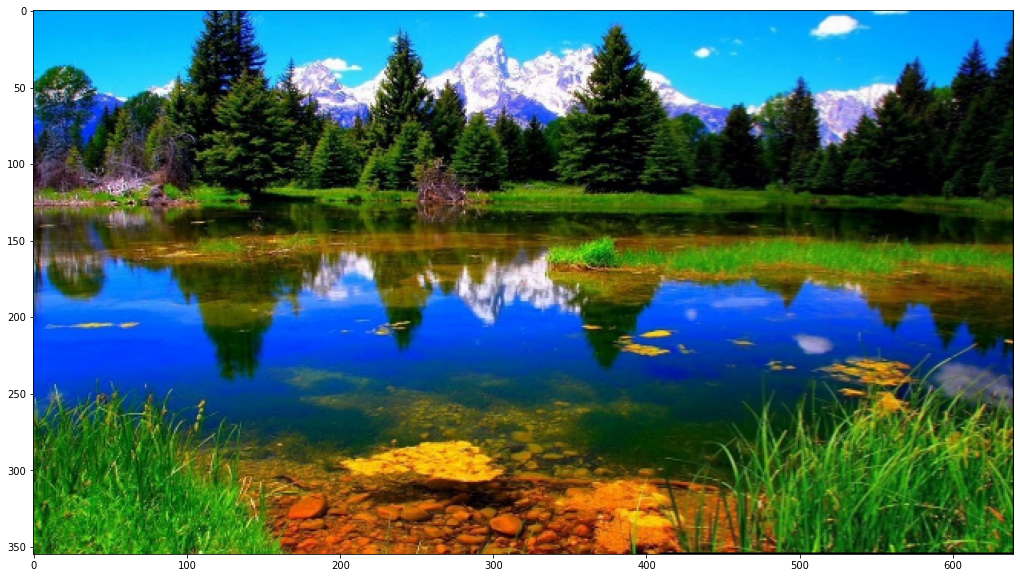

In [11]:
import imutils

scene1 = read_and_resize('panorama2.jpg', 0)
scene2 = read_and_resize('panorama1.jpg', 0)
showInRow([scene2,scene1])
sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT

kpsA, featuresA = sift.detectAndCompute(scene1,None)
kpsB, featuresB = sift.detectAndCompute(scene2,None)

# MATCH KEY POINTS
bf = cv2.BFMatcher()
matches = bf.knnMatch(featuresA,featuresB, k=2)
# Apply ratio test
good = []
good_matches = []
for m in matches:
  if len(m) == 2 and m[0].distance < m[1].distance * 0.7:
    good_matches.append((m[0].queryIdx, m[0].trainIdx))
    good.append([m[0]])


matches = np.asarray(good)

if (len(matches[:,0]) >= 4):
    src = np.float32([ kpsA[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kpsB[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)

    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)

width = scene1.shape[1] + scene2.shape[1]
height = scene1.shape[0] + scene2.shape[0]

# wraped image
dst = cv2.warpPerspective(scene1, H, (width, height))

#stitched image
dst[0 : scene2.shape[0], 0 : scene2.shape[1]] = scene2



# transform the panorama image to grayscale and threshold it 
gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)[1]
# Finds contours from the binary image
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
# get the maximum contour area
c = max(cnts, key=cv2.contourArea)
# get a bbox from the contour area
(x, y, w, h) = cv2.boundingRect(c)
# crop the image to the bbox coordinates
dst = dst[y:y + h, x:x + w]
# show the cropped image
plt.figure(figsize=(20,10))
plt.imshow(dst)


## Object detection using sift

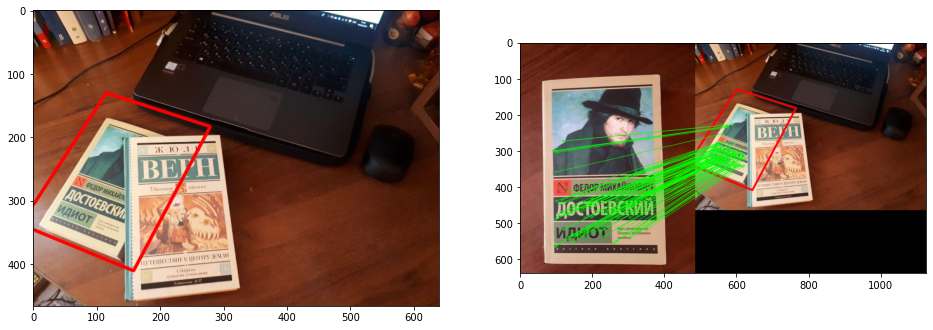

In [12]:
book = read_and_resize('book.jpg', 0)
scene = read_and_resize('book_scene_2.jpg', 0)

MIN_MATCH_COUNT = 10

sift = cv2.xfeatures2d.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(book,None)
kp2, des2 = sift.detectAndCompute(scene,None)


# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append(m)


if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    # findHomography is a method of finding the relation between two images of the same object taken from different viewing directions of the camera
    # findHomography returns a mask that tells us, which point pairs did not pass the Random Sample Consensus (RANSAC) filter
    matchesMask = mask.ravel().tolist()

    h,w,c = book.shape
    # Take corners of the first image and transform them onto the second image
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    scene = cv2.polylines(scene,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print ("Not enough matches were found, only %d. Needed: %d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(book,kp1,scene,kp2,good,None,**draw_params)

showInRow([scene, img3])

## Real time object detection

In [13]:
def sift_f(obj, scene):
  sift = cv2.xfeatures2d.SIFT_create()
  # find the keypoints and descriptors with SIFT
  kp1, des1 = sift.detectAndCompute(obj,None)
  kp2, des2 = sift.detectAndCompute(scene,None)


  # BFMatcher with default params
  bf = cv2.BFMatcher()
  matches = bf.knnMatch(des1,des2, k=2)

  # Apply ratio test
  good = []
  for m,n in matches:
      if m.distance < 0.75*n.distance:
          good.append(m)
  
  MIN_MATCH_COUNT=20

  if(len(good)>=MIN_MATCH_COUNT):
    tp=[]
    qp=[]

    for m in good:
        tp.append(kp1[m.queryIdx].pt)
        qp.append(kp2[m.trainIdx].pt)

    tp,qp=np.float32((tp,qp))

    H,status=cv2.findHomography(tp,qp,cv2.RANSAC,3.0)

    h,w,c=obj.shape
    trainBorder=np.float32([[[0,0],[0,h-1],[w-1,h-1],[w-1,0]]])
    queryBorder=cv2.perspectiveTransform(trainBorder,H)
    cv2.polylines(scene,[np.int32(queryBorder)],True,(0,255,0),5)
    return scene
  else:
    print ("Not Enough matches found- %d/%d"%(len(good),MIN_MATCH_COUNT))

## References

harris corner detector [link](https://muthu.co/harris-corner-detector-implementation-in-python/)

SIFT [link](https://docs.opencv.org/trunk/da/df5/tutorial_py_sift_intro.html)

SIFT Python Implementation [link](https://medium.com/@lerner98/implementing-sift-in-python-36c619df7945)

Panoramas [link](https://www.pyimagesearch.com/2016/01/11/opencv-panorama-stitching/)

Object detection with SIFT [link](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_feature_homography/py_feature_homography.html)